In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import matplotlib.pylab as plb
import itertools
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('zillow_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [4]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [5]:
df_set = df[(df.State == 'TX') & (df.City == 'Houston')]
df_set

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
44,91685,77036,Houston,TX,Houston,Harris,45,120400.0,118700.0,117300.0,...,174900,174600,175000,176000,177200,177700,177700,179800,185100,189800
63,91726,77077,Houston,TX,Houston,Harris,64,177100.0,180000.0,182700.0,...,309600,310000,310800,311600,311800,311200,310500,311400,313800,315900
182,91744,77095,Houston,TX,Houston,Harris,183,131700.0,131300.0,131100.0,...,208900,210200,210700,211200,212300,213100,212800,214300,217500,219600
279,91731,77082,Houston,TX,Houston,Harris,280,101600.0,101300.0,100800.0,...,165800,166600,167600,168400,169000,169800,170800,171800,172500,172900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892,91727,77078,Houston,TX,Houston,Harris,7893,45700.0,45700.0,45700.0,...,93400,94700,96700,98100,97500,96600,96600,97500,98500,99400
8125,91717,77068,Houston,TX,Houston,Harris,8126,136300.0,135900.0,135500.0,...,205700,205700,206200,206800,207100,207600,207800,208700,210300,211500
8230,91681,77032,Houston,TX,Houston,Harris,8231,57100.0,57100.0,57000.0,...,104800,105600,106500,108200,111200,113600,115600,117400,118800,119200
8357,91743,77094,Houston,TX,Houston,Harris,8358,356300.0,357700.0,358800.0,...,375100,374400,374100,374700,375300,375000,373400,372800,373600,373900


In [6]:
df_set = df_set.sort_values(by='SizeRank')
df_set

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
44,91685,77036,Houston,TX,Houston,Harris,45,120400.0,118700.0,117300.0,...,174900,174600,175000,176000,177200,177700,177700,179800,185100,189800
63,91726,77077,Houston,TX,Houston,Harris,64,177100.0,180000.0,182700.0,...,309600,310000,310800,311600,311800,311200,310500,311400,313800,315900
182,91744,77095,Houston,TX,Houston,Harris,183,131700.0,131300.0,131100.0,...,208900,210200,210700,211200,212300,213100,212800,214300,217500,219600
279,91731,77082,Houston,TX,Houston,Harris,280,101600.0,101300.0,100800.0,...,165800,166600,167600,168400,169000,169800,170800,171800,172500,172900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892,91727,77078,Houston,TX,Houston,Harris,7893,45700.0,45700.0,45700.0,...,93400,94700,96700,98100,97500,96600,96600,97500,98500,99400
8125,91717,77068,Houston,TX,Houston,Harris,8126,136300.0,135900.0,135500.0,...,205700,205700,206200,206800,207100,207600,207800,208700,210300,211500
8230,91681,77032,Houston,TX,Houston,Harris,8231,57100.0,57100.0,57000.0,...,104800,105600,106500,108200,111200,113600,115600,117400,118800,119200
8357,91743,77094,Houston,TX,Houston,Harris,8358,356300.0,357700.0,358800.0,...,375100,374400,374100,374700,375300,375000,373400,372800,373600,373900


In [7]:
df_set = df_set[:15]
df_set

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
44,91685,77036,Houston,TX,Houston,Harris,45,120400.0,118700.0,117300.0,...,174900,174600,175000,176000,177200,177700,177700,179800,185100,189800
63,91726,77077,Houston,TX,Houston,Harris,64,177100.0,180000.0,182700.0,...,309600,310000,310800,311600,311800,311200,310500,311400,313800,315900
182,91744,77095,Houston,TX,Houston,Harris,183,131700.0,131300.0,131100.0,...,208900,210200,210700,211200,212300,213100,212800,214300,217500,219600
279,91731,77082,Houston,TX,Houston,Harris,280,101600.0,101300.0,100800.0,...,165800,166600,167600,168400,169000,169800,170800,171800,172500,172900
321,91706,77057,Houston,TX,Houston,Harris,322,448800.0,450100.0,451500.0,...,566300,566500,567200,566600,562200,554300,547900,548400,557300,565000
387,91656,77007,Houston,TX,Houston,Harris,388,311900.0,308000.0,303500.0,...,402100,403600,405600,407100,406600,405500,405000,406300,409500,411700
529,91719,77070,Houston,TX,Houston,Harris,530,120000.0,119600.0,119200.0,...,192300,192700,193400,193900,194500,194800,195000,195600,197000,197900
817,91730,77081,Houston,TX,Houston,Harris,818,273800.0,275500.0,277200.0,...,372000,371700,370000,370200,372300,374800,379200,384600,389200,391800
819,91712,77063,Houston,TX,Houston,Harris,820,224200.0,228000.0,231800.0,...,334100,336700,337600,337400,338900,339600,337000,339400,348700,355800


In [8]:
df_set.isna().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

Filtering dataset to the top 15 Size Rank in Houston,TX Harris County. 

In [9]:
df_set.reset_index(drop=True, inplace=True)

In [10]:
df_info = df_set.loc[:, ['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank']]

In [11]:
final_df = pd.concat([df_info, df_set.loc[:,'2011-01': '2017-12']], axis=1)

In [12]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [13]:
date_time_idx = get_datetimes(final_df)

In [14]:
date_time_idx

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

In [15]:
date_time_idx = date_time_idx.strftime('%Y-%m')

In [16]:
date_time_idx

Index(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', 

In [17]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [18]:
zipcode_data = {}
for i in range(0,15):
    zipcode_data[str(final_df.loc[i, 'RegionName'])] = melt_data(pd.DataFrame(final_df.iloc[i:i+1, :], columns=final_df.columns))

In [19]:
z = pd.DataFrame()
for key in zipcode_data.keys():
    z = pd.concat([z , zipcode_data[key]], axis=1)

In [20]:
z.values

array([[118800., 125000., 207100., ...,  86700., 289000., 120500.],
       [118300., 125400., 207100., ...,  86400., 288700., 119700.],
       [118200., 125900., 207600., ...,  86300., 289000., 119500.],
       ...,
       [161900., 176000., 311600., ..., 127100., 425500., 166300.],
       [162800., 177200., 311800., ..., 128500., 426500., 168600.],
       [162800., 177700., 311200., ..., 129700., 427600., 171100.]])

In [21]:
zipcode = pd.DataFrame(z.values, columns=zipcode_data.keys())

In [22]:
zipcode.info()
zipcode.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   77084   84 non-null     float64
 1   77036   84 non-null     float64
 2   77077   84 non-null     float64
 3   77095   84 non-null     float64
 4   77082   84 non-null     float64
 5   77057   84 non-null     float64
 6   77007   84 non-null     float64
 7   77070   84 non-null     float64
 8   77081   84 non-null     float64
 9   77063   84 non-null     float64
 10  77042   84 non-null     float64
 11  77072   84 non-null     float64
 12  77015   84 non-null     float64
 13  77008   84 non-null     float64
 14  77040   84 non-null     float64
dtypes: float64(15)
memory usage: 10.0 KB


,77084,77036,77077,77095,77082,77057,77007,77070,77081,77063,77042,77072,77015,77008,77040
0,118800.0,125000.0,207100.0,155600.0,118900.0,439200.0,297300.0,144400.0,259500.0,244100.0,256900.0,83700.0,86700.0,289000.0,120500.0
1,118300.0,125400.0,207100.0,154600.0,118200.0,436900.0,296600.0,143800.0,257300.0,243800.0,255400.0,83400.0,86400.0,288700.0,119700.0
2,118200.0,125900.0,207600.0,154500.0,117900.0,435100.0,296600.0,143200.0,256000.0,244100.0,255000.0,82800.0,86300.0,289000.0,119500.0
3,118100.0,126200.0,209100.0,154800.0,117500.0,435200.0,297200.0,142900.0,258400.0,244400.0,255700.0,82200.0,86300.0,290100.0,119700.0
4,118000.0,126400.0,210700.0,155100.0,117000.0,436600.0,298200.0,142800.0,261900.0,245600.0,256500.0,82100.0,86200.0,292000.0,119600.0


In [23]:
zipcode = zipcode.set_index(date_time_idx)

In [24]:
zipcode.head()

,77084,77036,77077,77095,77082,77057,77007,77070,77081,77063,77042,77072,77015,77008,77040
2011-01,118800.0,125000.0,207100.0,155600.0,118900.0,439200.0,297300.0,144400.0,259500.0,244100.0,256900.0,83700.0,86700.0,289000.0,120500.0
2011-02,118300.0,125400.0,207100.0,154600.0,118200.0,436900.0,296600.0,143800.0,257300.0,243800.0,255400.0,83400.0,86400.0,288700.0,119700.0
2011-03,118200.0,125900.0,207600.0,154500.0,117900.0,435100.0,296600.0,143200.0,256000.0,244100.0,255000.0,82800.0,86300.0,289000.0,119500.0
2011-04,118100.0,126200.0,209100.0,154800.0,117500.0,435200.0,297200.0,142900.0,258400.0,244400.0,255700.0,82200.0,86300.0,290100.0,119700.0
2011-05,118000.0,126400.0,210700.0,155100.0,117000.0,436600.0,298200.0,142800.0,261900.0,245600.0,256500.0,82100.0,86200.0,292000.0,119600.0


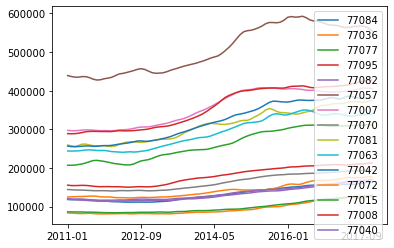

In [25]:
zipcode.plot();

#### SARIMA

Determine 'pdq' for SARIMA model. Since each future value predicted is dependent on where previous value was. Each effect is weighted, how much the error is, and each error combined with the last. 
- number of Auto-Regressive terms (p): uses the effect of past values into the model
- number of Differences (d): amount of differencing as it identifies the numer of lag values to subtract from the current observation. 
- number of Moving Average terms (q): set the error of the model as a linear combination of the error values observed previous time points in the past. 

In [26]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [27]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for c in zipcode.columns:
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = SARIMAX(zipcode[c],
                              order=comb,
                              seasonal_order=combs,
                              enforce_stationarity=False,
                              enforce_invertibility=False)

                output = mod.fit()
                ans.append([comb, combs, output.aic])
                #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
            except:
                continue

In [28]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic        819.822075
Name: 507, dtype: object

In [29]:
def sarimax_model(df, start=None, end=None):
    model = SARIMAX(df,
                    order=(1, 1, 1), 
                    seasonal_order=(1, 1, 1, 12), 
                    enforce_stationarity=False, 
                    enforce_invertibility=False)
    #fit model
    output = model.fit()
    #predictions
    pred = output.get_prediction(start=pd.to_datetime(start), end=pd.to_datetime(end),dynamic=False)
    return pred

In [30]:
zipcode_pred_mean = pd.DataFrame()
for c in zipcode[:'2016-12'].columns:
    pred = sarimax_model(zipcode[c], start='2017-01', end='2017-12')
    pred_mean_dict = {c: list(pred.predicted_mean)}
    pred_mean_df = pd.DataFrame(pred_mean_dict)
    zipcode_pred_mean = pd.concat([zipcode_pred_mean, pred_mean_df], axis=1)

In [31]:
zipcode_pred_mean

,77084,77036,77077,77095,77082,77057,77007,77070,77081,77063,77042,77072,77015,77008,77040
0,156969.667855,168608.088520,308060.657593,208718.152023,159659.548444,570793.445316,396695.401028,188558.693394,362249.442070,340100.659806,383257.166490,120189.000671,120214.889349,412123.677115,156026.603465
1,156864.391826,169471.025429,307258.401306,208886.901664,159441.186038,564026.957450,396409.025078,189013.557024,367136.763368,340943.829205,384426.712173,120474.848192,121194.956337,410052.795499,156163.096553
2,157173.779858,170535.428186,309199.180731,208726.526387,161185.004636,570591.858997,397262.042472,190050.311482,369607.217943,341093.768018,378620.771723,122482.503548,121745.192015,412268.155322,157736.006721
3,157869.771064,172800.017371,308811.205776,208173.470891,163032.578980,566374.066801,397642.538551,190960.226278,368125.873011,339743.893654,377558.550838,123586.494822,122443.674704,413534.246796,160412.508213
4,158061.313313,175775.413410,309587.551879,207985.866069,164620.619005,562232.221557,398092.025320,192134.254300,369265.073692,336338.065134,383353.994120,125211.972884,123753.504606,413735.105190,161426.350341
5,157681.190703,176909.549809,309506.323311,207851.154472,165926.066306,558340.034872,399571.019127,192737.888437,372113.091873,334829.269694,388970.481252,124737.664273,124511.073454,413721.093477,161700.816563
6,157834.779036,175173.709911,309294.385457,208324.862902,165990.892347,566629.209271,403214.699519,192498.996942,373991.663672,335022.806730,384468.356608,124618.818770,125591.010521,418809.776230,163116.566979
7,158315.780878,174443.834048,309699.546923,209555.497704,166350.699225,568523.152319,403185.182377,192100.307907,371819.072565,334554.953172,382120.294617,122572.645321,126272.250482,421328.689949,164925.625584
8,159306.617987,174585.162945,310613.440791,211663.404831,167346.830539,566440.477970,404239.241934,193207.983762,369831.459238,337952.141062,379990.194245,122514.997053,126207.572176,424124.258849,165510.854495
9,161497.727713,175305.760034,311399.484168,211174.534866,168806.754429,566195.710204,407417.752300,194167.210543,367242.154464,336631.658680,382583.650999,122900.370243,126625.856503,425426.790978,165425.984895


In [32]:
#root mean squared error for predicted mean and actual. from 2017-01 : 2017-12
for c in zipcode.columns:
    print(c)
    print(round(sqrt(mean_squared_error(zipcode['2017-01':'2017-12'][c], zipcode_pred_mean[c])), 2))

77084
520.78
77036
667.3
77077
426.21
77095
445.05
77082
363.91
77057
2856.75
77007
906.44
77070
300.35
77081
1740.71
77063
1285.98
77042
1751.77
77072
582.84
77015
254.39
77008
1076.11
77040
608.76


In [35]:
future_mean = pd.DataFrame()
for c in zipcode[:'2016-12'].columns:
    pred_1 = sarimax_model(zipcode[c], start='2018-01', end='2020-12')
    pred_mean_dict_1 = {c: list(pred_1.predicted_mean)}
    pred_mean_df_1 = pd.DataFrame(pred_mean_dict_1)
    future_mean = pd.concat([future_mean, pred_mean_df_1], axis=1)

In [36]:
future_mean

,77084,77036,77077,77095,77082,77057,77007,77070,77081,77063,77042,77072,77015,77008,77040
0,162837.292843,178057.626491,310586.036834,214264.746191,170627.623272,546969.047805,405038.216826,195266.147163,377213.491670,341919.874298,383152.825527,127207.223844,130659.436427,429356.439294,173735.357433
1,162867.781311,178627.841143,310892.067395,214940.553458,171633.112263,543155.971924,405215.619426,195579.676616,378225.431898,345484.429553,381088.271545,128301.908544,131535.796214,431492.365037,176182.785623
2,162696.862929,178957.700524,311128.032145,214838.417488,172565.440010,539123.128069,405255.939543,195704.950608,378459.343092,348233.899686,378550.830500,129058.827129,132301.116065,433375.065795,178325.643651
3,162601.200688,179842.368214,311565.324878,214891.795289,173541.736492,534010.817101,405500.722299,196044.536821,379763.648839,350651.104140,380201.091430,130009.026645,133199.914612,434869.408355,180525.055976
4,162995.639423,181544.856309,312123.423680,215364.236609,174837.814375,531546.005366,406176.014452,196578.523373,382641.867534,352647.536212,384511.108965,131169.384723,134241.518773,436717.341690,182906.295702
5,163580.334514,182487.155409,312379.875389,215810.708402,175886.042545,532032.007794,407321.651244,196914.898316,385203.774877,353187.774569,385283.953445,132102.976877,135270.384851,439066.907744,185187.187028
6,163824.481473,182505.804507,312345.257177,216460.169497,176655.164725,533265.157174,408575.782292,196982.946309,387302.204690,352397.577386,383018.557019,132722.104314,136040.448257,441284.220343,187097.738305
7,163883.672814,182650.774349,312605.580780,217482.172089,177688.103591,533086.046398,409831.586881,197068.408353,389070.961510,351337.929768,381073.651422,133753.396977,136694.190421,443864.448514,188732.034361
8,163828.118370,183213.973797,313218.960512,218056.815983,179145.901743,533529.462108,411437.253549,197348.718022,392083.571428,349151.444469,380810.417917,134867.323993,137263.487932,446537.209464,190300.122774
9,163621.214698,184062.620911,313814.066137,218658.770986,180974.731581,532752.021942,412522.442614,197663.873485,395098.976421,346508.399610,381301.667906,136034.586373,138017.067054,448733.106937,191505.594373
